# Result Table Generation

## Imports

In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from evaluation.apply_evaluation import fetch_and_report_wandb

## Settings

In [3]:
# login to wandb
# wandb.login()

In [4]:
%matplotlib inline

## Visualisations

Found 192 result files. Loading...
Data loaded and processed successfully.

Found 2 evaluation datasets. Generating a dashboard for each...
  [1/2] Generating dashboard for eval_dataset: 'datablations/c4-filter-small'
datablations/c4-filter-small
    -> Plot 1 saved to 'results/visualizations/dashboard_1_EV_eval_on_datablations_c4-filter-small.png'


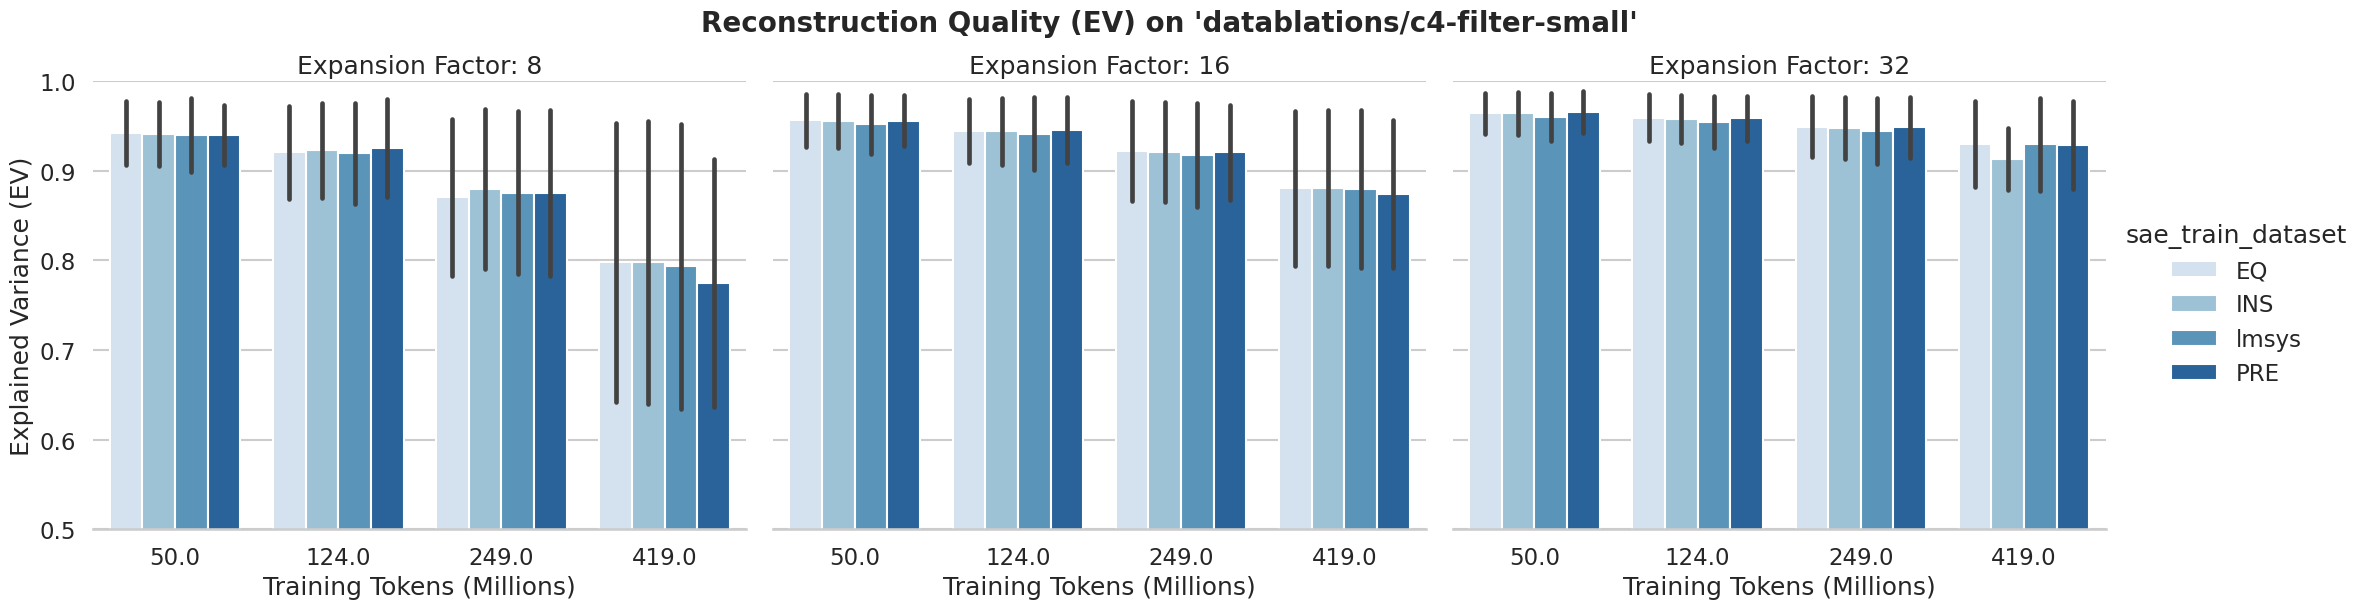

    -> Plot 2 saved to 'results/visualizations/dashboard_2_DeadFeatures_eval_on_datablations_c4-filter-small.png'


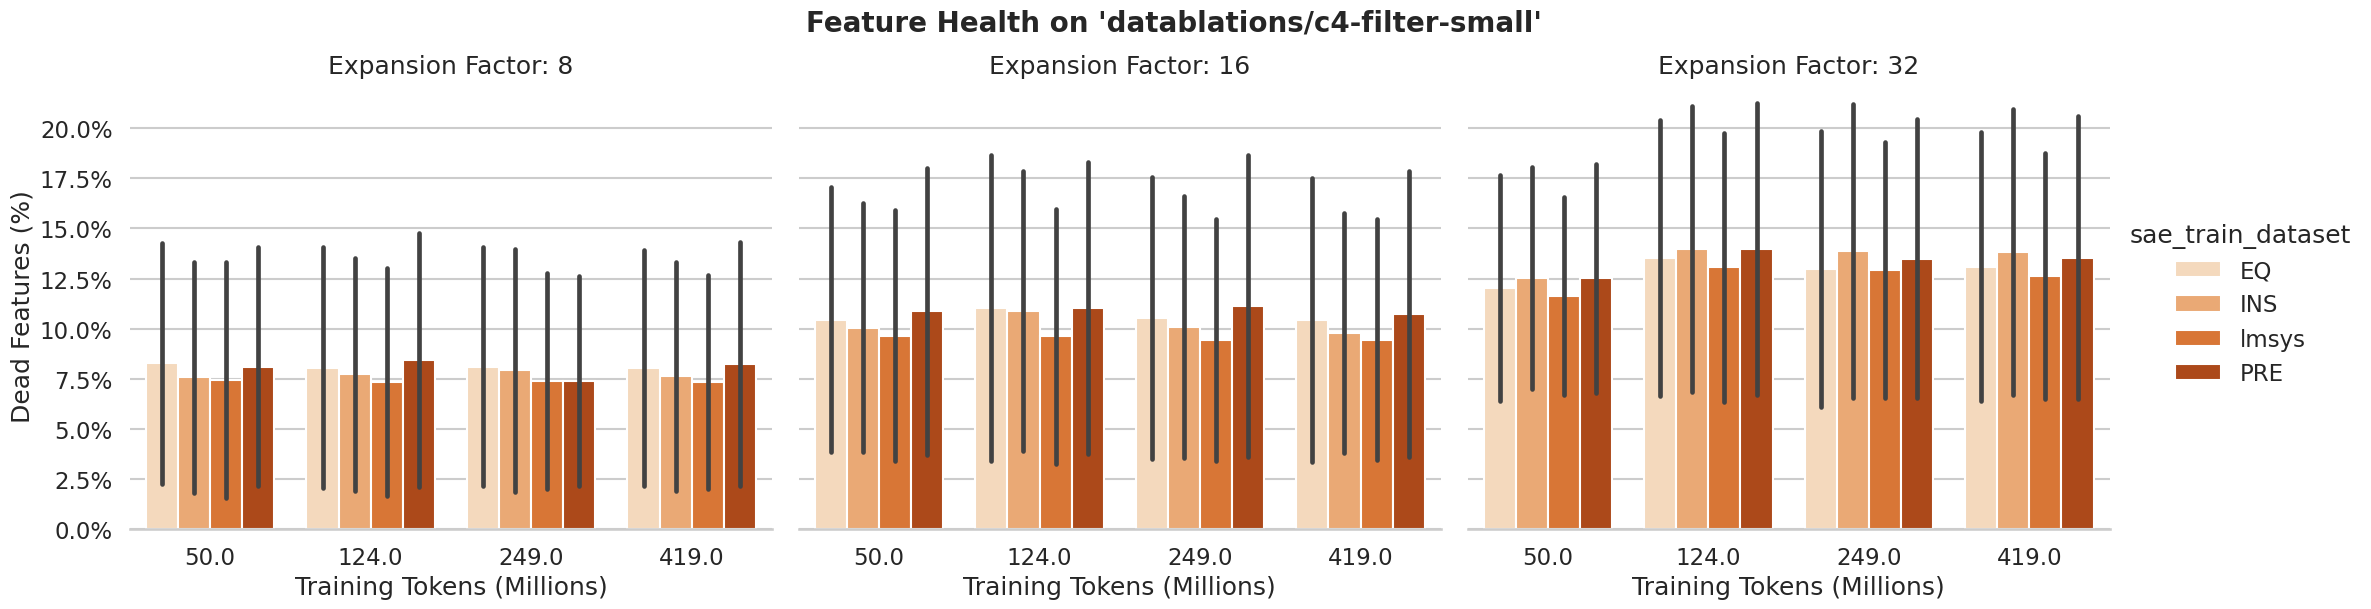

    -> Plot 3 saved to 'results/visualizations/dashboard_3_Tradeoff_eval_on_datablations_c4-filter-small.png'


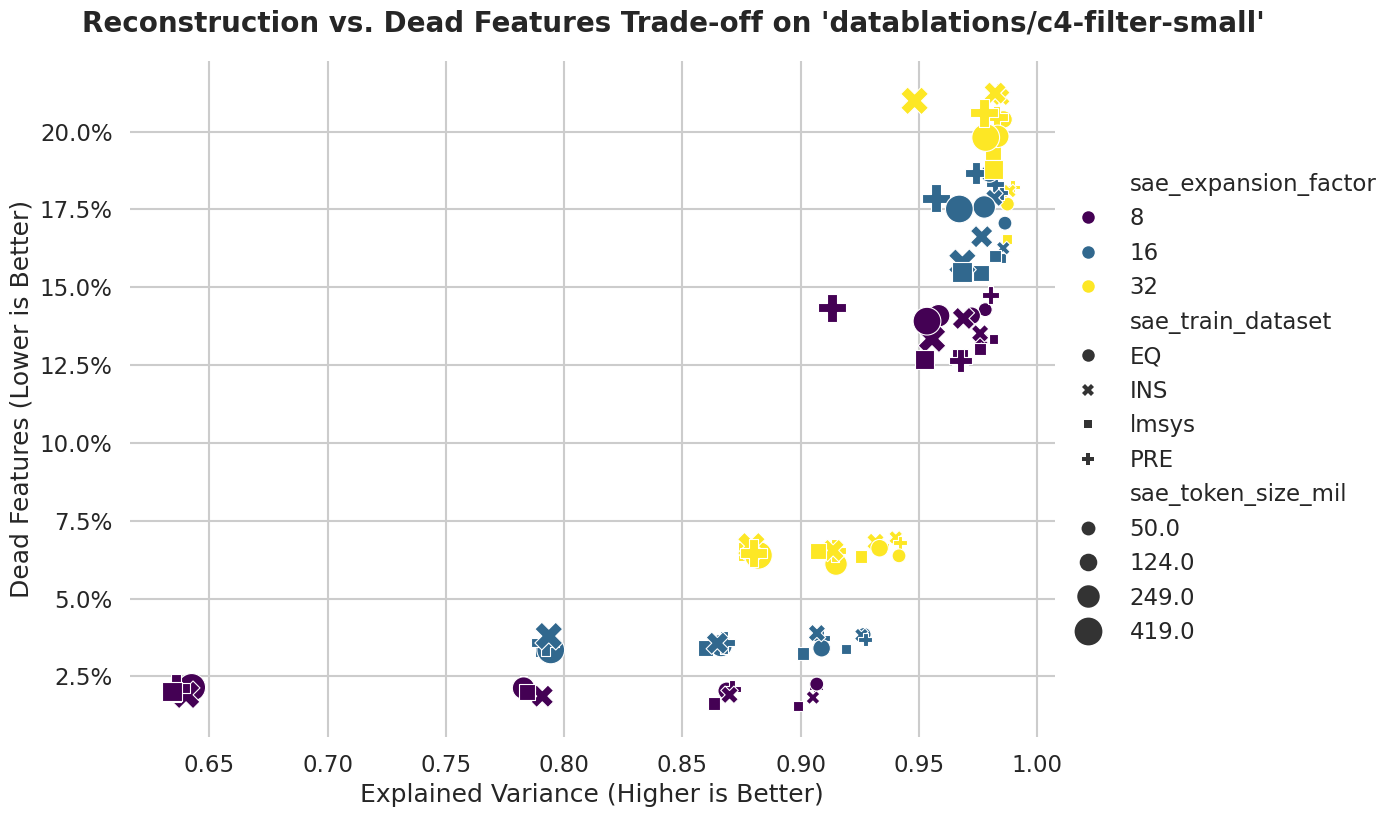

  [2/2] Generating dashboard for eval_dataset: 'GAIR/lima'
GAIR/lima
    -> Plot 1 saved to 'results/visualizations/dashboard_1_EV_eval_on_GAIR_lima.png'


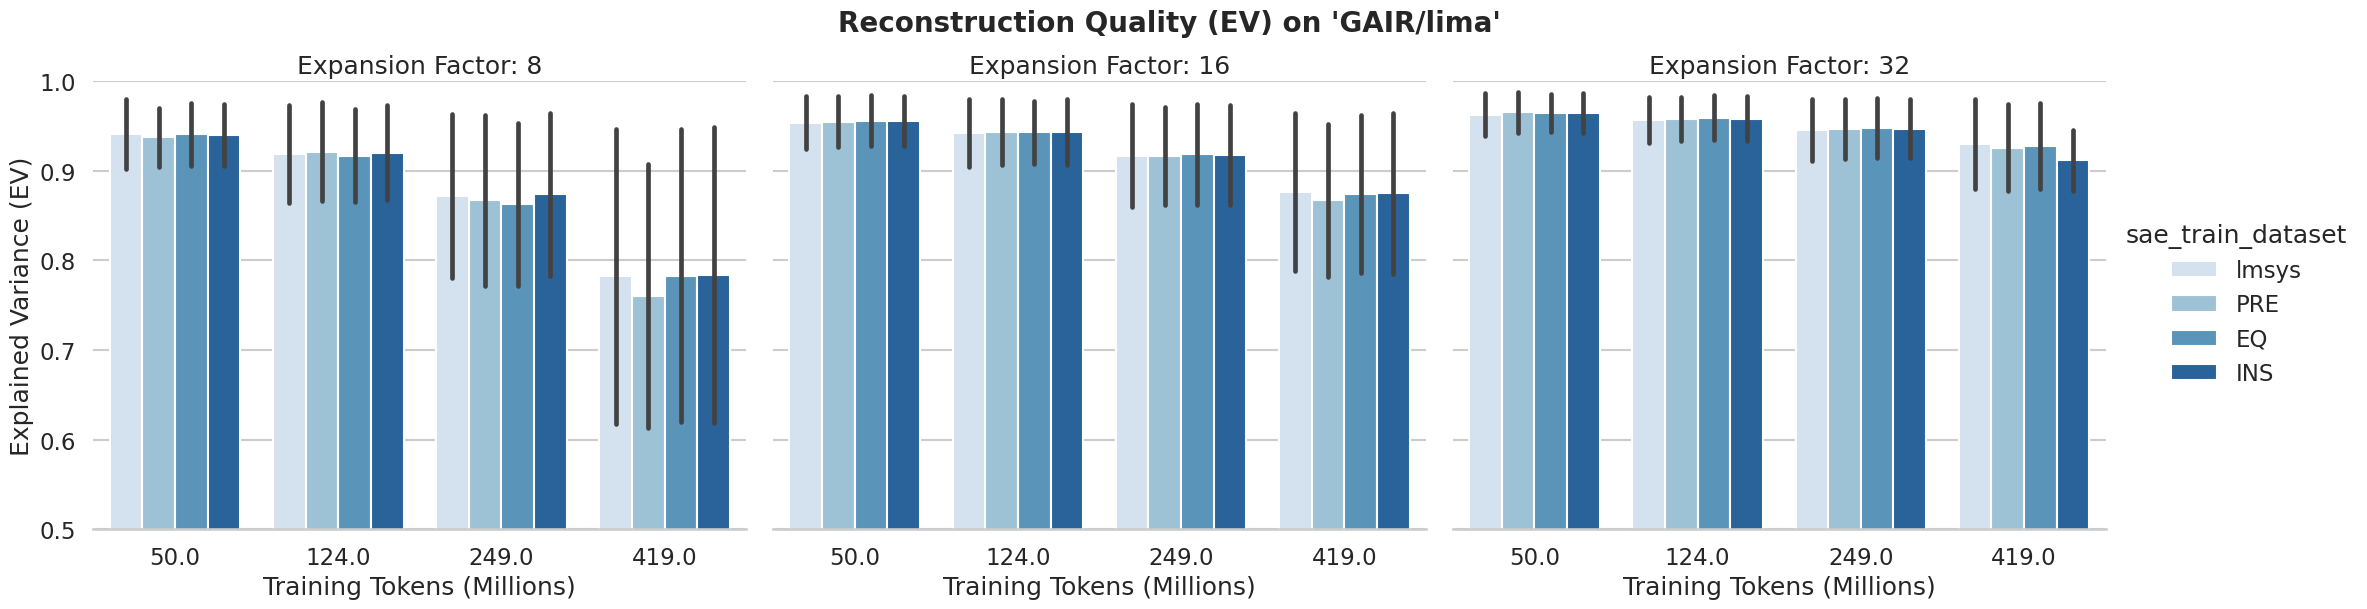

    -> Plot 2 saved to 'results/visualizations/dashboard_2_DeadFeatures_eval_on_GAIR_lima.png'


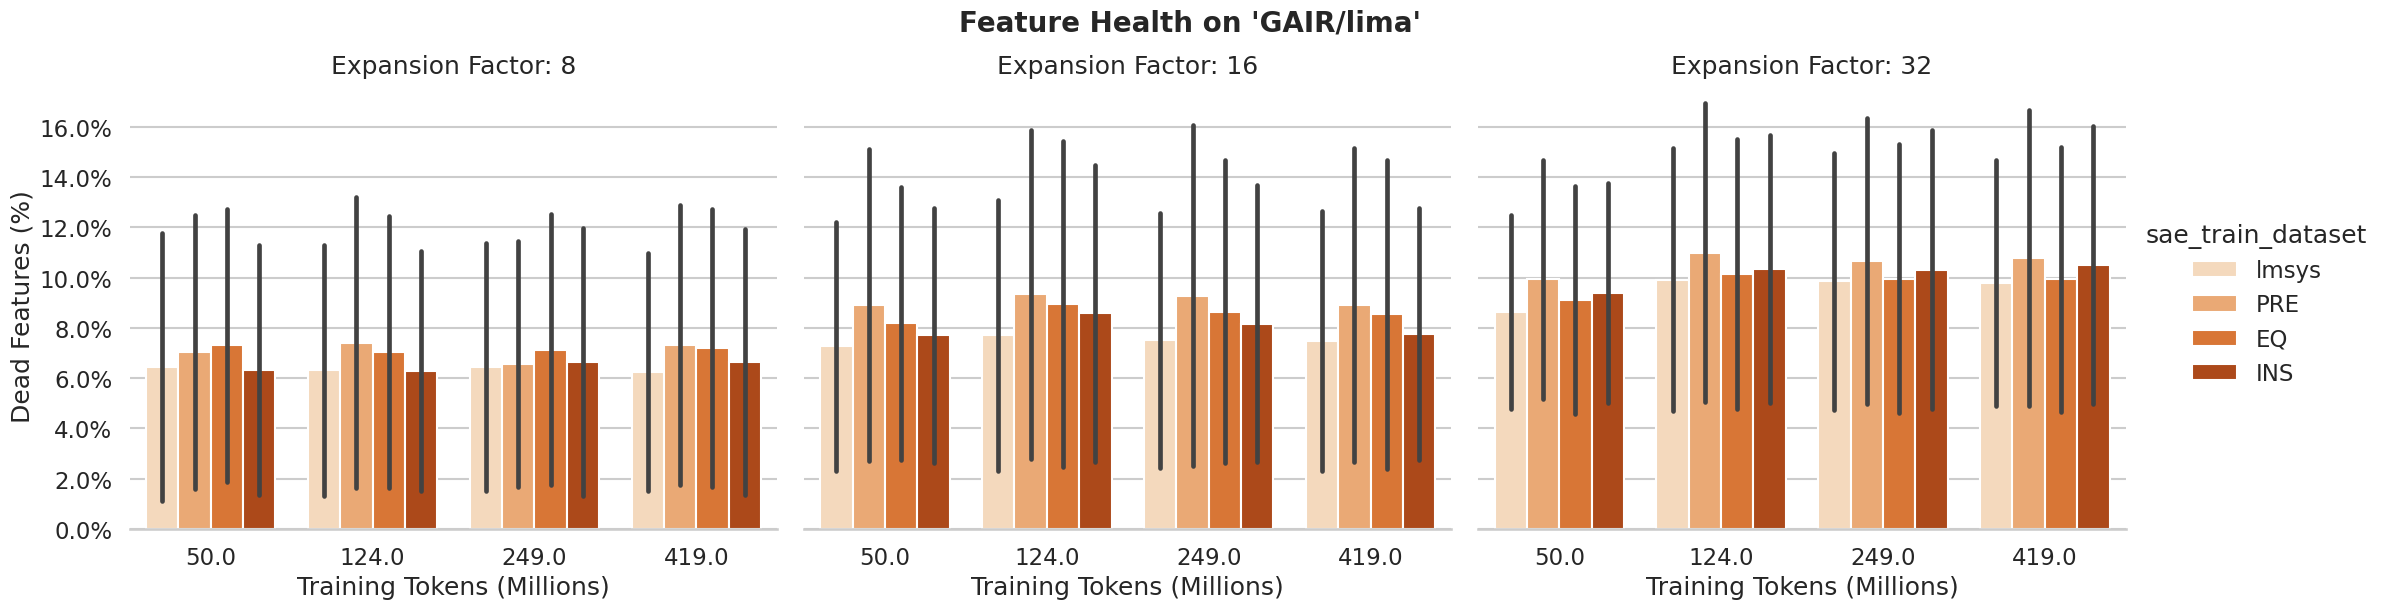

    -> Plot 3 saved to 'results/visualizations/dashboard_3_Tradeoff_eval_on_GAIR_lima.png'


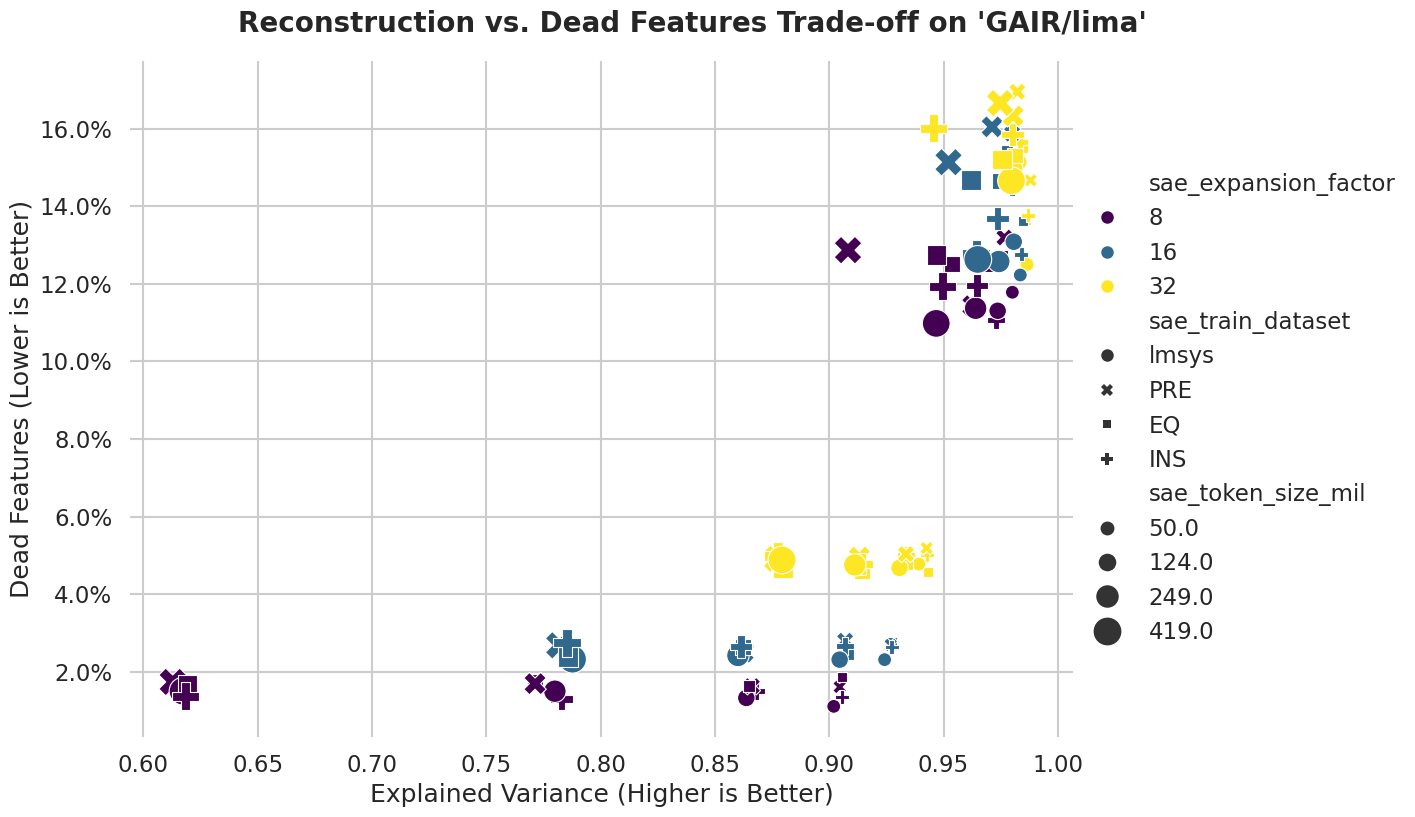

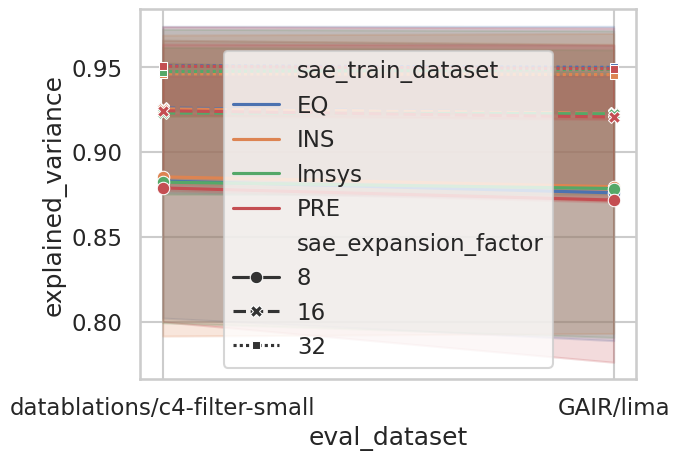

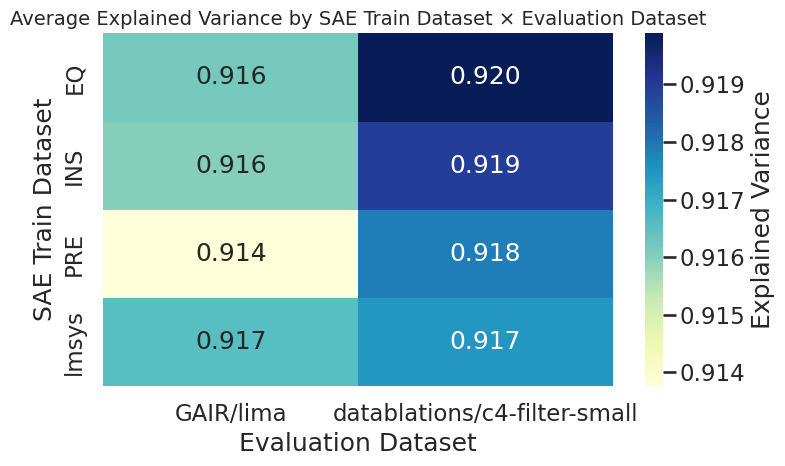

In [5]:
from evaluation.visualise_sae_metrics import load_sae_results, visualize_sae_results_grouped

RESULTS_DIRECTORY = "results/saes/"

results_df = load_sae_results(RESULTS_DIRECTORY)
if not results_df.empty:
    visualize_sae_results_grouped(results_df)

In [6]:
results_df.sort_values(by="mse", ascending=True)

,explained_variance,fraction_var_unexplained,mse,cosine_similarity,activation_sparsity_l0,weight_sparsity,dead_features_pct,dead_features_count,total_latents,eval_dataset,model,layer,sae_train_dataset,sae_token_size,sae_expansion_factor,sae_k_value,sae_checkpoint_name,sae_token_size_mil
72,0.943233,0.056767,1.024234,0.970973,0.003472,0.000029,0.045627,841,18432,GAIR/lima,HuggingFaceTB/SmolLM2-135M,6,EQ,50M,32,64,smollm2-sparsify-EQ-50M-token-6_25-layers-32-e...,50.0
23,0.942723,0.057277,1.033431,0.970637,0.003472,0.000028,0.050130,924,18432,GAIR/lima,HuggingFaceTB/SmolLM2-135M,6,INS,50M,32,64,smollm2-sparsify-INS-50M-token-6_25-layers-32-...,50.0
122,0.942610,0.057390,1.035462,0.970636,0.003472,0.000027,0.051866,956,18432,GAIR/lima,HuggingFaceTB/SmolLM2-135M,6,PRE,50M,32,64,smollm2-sparsify-PRE-50M-token-6_25-layers-32-...,50.0
124,0.939191,0.060809,1.097150,0.968727,0.003472,0.000028,0.047743,880,18432,GAIR/lima,HuggingFaceTB/SmolLM2-135M,6,lmsys,50M,32,64,smollm2-sparsify-lmsys-50M-token-6_25-layers-3...,50.0
53,0.942081,0.057919,1.137375,0.968388,0.003472,0.000027,0.067925,1252,18432,datablations/c4-filter-small,HuggingFaceTB/SmolLM2-135M,6,PRE,50M,32,64,smollm2-sparsify-PRE-50M-token-6_25-layers-32-...,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.953430,0.046570,162.295610,0.840606,0.013889,0.000200,0.139106,641,4608,datablations/c4-filter-small,HuggingFaceTB/SmolLM2-135M,25,EQ,419M,8,64,smollm2-sparsify-EQ-419M-token-6_25-layers-8-e...,419.0
142,0.952399,0.047601,165.888999,0.821945,0.013889,0.000166,0.126736,584,4608,datablations/c4-filter-small,HuggingFaceTB/SmolLM2-135M,25,lmsys,419M,8,64,smollm2-sparsify-lmsys-419M-token-6_25-layers-...,419.0
150,0.948181,0.051819,180.588454,0.940902,0.003472,0.000046,0.209852,3868,18432,datablations/c4-filter-small,HuggingFaceTB/SmolLM2-135M,25,INS,419M,32,64,smollm2-sparsify-INS-419M-token-6_25-layers-32...,419.0
9,0.908226,0.091774,273.553894,0.844701,0.013889,0.000149,0.128689,593,4608,GAIR/lima,HuggingFaceTB/SmolLM2-135M,25,PRE,419M,8,64,smollm2-sparsify-PRE-419M-token-6_25-layers-8-...,419.0


In [7]:
results_df.to_csv("results/saes/aggregations/saes.csv", index=False)

In [8]:
df_summary = results_df.groupby(["sae_train_dataset", "sae_expansion_factor", "eval_dataset"]).agg({
    "explained_variance": "mean",
    "dead_features_pct": "mean",
    "activation_sparsity_l0": "mean"
}).reset_index()

## Report Gathering & Tables

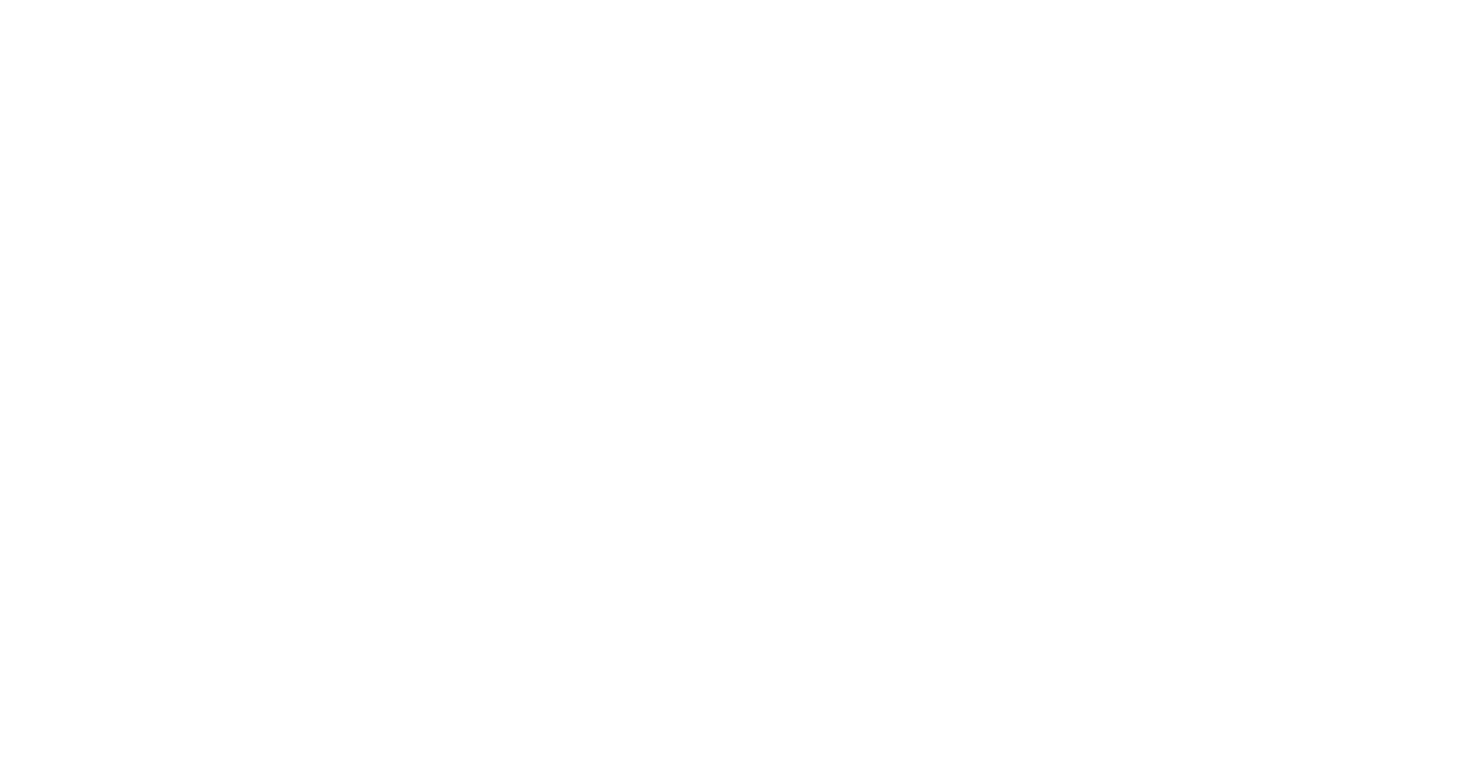

In [9]:
df_long, df_short, latex_long, latex_short, fig = fetch_and_report_wandb(
    "tilmankerl-technical-university-of-vienna/MA-sae-train/k867a0u3"
)

In [10]:
display(df_long)
display(df_short)

,Metric,Value
0,Explained Variance,-21.291372
1,Reconstruction MSE,112.596863
2,Cosine Similarity,0.905586
3,Overall Loss,487019.312500
4,MSE Loss,484256.343750
5,L1 Loss,5525.955078
6,Activation Sparsity (L0),4069.241943
7,L1 Sparsity (sum abs activ.),5526.010254
8,Dead Features,0.000000
9,Shrinkage (L2 Ratio),6.015663


,Metric,Value
0,Explained Variance,-21.291372
1,Reconstruction MSE,112.596863
2,Activation Sparsity (L0),4069.241943
3,L1 Sparsity,5526.010254
4,Overall Loss,487019.312500
5,CE Loss (no SAE),2.719747


In [11]:
print(latex_long)
print(latex_short)

\begin{table}
\caption{SAE Training results for \texttt{pythia-410m-deduped} on hook \texttt{blocks.10.hook_resid_post}, using the \texttt{lmsys-chat-1m-english-tokenized} dataset.}
\label{tab:sae_metrics_full}
\begin{tabular}{lr}
\toprule
Metric & Value \\
\midrule
Explained Variance & -21.2914 \\
Reconstruction MSE & 112.5969 \\
Cosine Similarity & 0.9056 \\
Overall Loss & 487019.3125 \\
MSE Loss & 484256.3438 \\
L1 Loss & 5525.9551 \\
Activation Sparsity (L0) & 4069.2419 \\
L1 Sparsity (sum abs activ.) & 5526.0103 \\
Dead Features & 0.0000 \\
Shrinkage (L2 Ratio) & 6.0157 \\
Relative Recon. Bias & 6.5952 \\
CE Loss (no SAE) & 2.7197 \\
CE Loss (with SAE) & 4.4576 \\
CE Loss (ablation) & 11.6825 \\
CE Loss Score & 0.8061 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{SAE Training results for \texttt{pythia-410m-deduped} on hook \texttt{blocks.10.hook_resid_post}, using the \texttt{lmsys-chat-1m-english-tokenized} dataset.}
\label{tab:sae_metrics_short}
\begin{tabula